## Logistic Regression - Lead Scoring Case Study
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

### Step 1: Importing Libraries & Reading Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
path = 'C:/Users/home pc/OneDrive/Desktop/UpGrad_Msc in Data Science/2. Course 2/Logistic Regression/Assignment'
os.chdir(path)
print(os.getcwd())

C:\Users\home pc\OneDrive\Desktop\UpGrad_Msc in Data Science\2. Course 2\Logistic Regression\Assignment


In [5]:
# Importing all datasets
leads_df = pd.read_csv("leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Data Cleaning & Exploratory Data Analysis

In [6]:
## Finding Missing Values in the Columns
def Data_Quality(data):
    
    # Creating a DataFrame to store the results
    result_df = pd.DataFrame(columns=['Variable', 'Data_Type','Variable_Type',
                                      'Missing_Values', 'Missing_Values_Per', 'Unique_Values'])

    # Iterating over each column in the dataset
    for column in data.columns:
        # Calculating stats for categorical variables
        data_type = data[column].dtype
        missing_values = data[column].isnull().sum()
        missing_values_percent = (missing_values / len(data)) * 100
        unique_values = data[column].nunique()

        # Appending the results to the DataFrame
        result_df = result_df.append({'Variable': column,
                                        'Data_Type': data_type,
                                        'Variable_Type': 'Categorical'if data[column].dtype == 'object' else "Numerical",
                                        'Missing_Values': missing_values,
                                        'Missing_Values_Per': missing_values_percent,
                                        'Unique_Values': unique_values},
                                        ignore_index=True)
        

    return result_df

In [7]:
Clean_Step=Data_Quality(leads_df)
Clean_Step

,Variable,Data_Type,Variable_Type,Missing_Values,Missing_Values_Per,Unique_Values
0,Prospect ID,object,Categorical,0,0.000000,9240
1,Lead Number,int64,Numerical,0,0.000000,9240
2,Lead Origin,object,Categorical,0,0.000000,5
3,Lead Source,object,Categorical,36,0.389610,21
4,Do Not Email,object,Categorical,0,0.000000,2
5,Do Not Call,object,Categorical,0,0.000000,2
6,Converted,int64,Numerical,0,0.000000,2
7,TotalVisits,float64,Numerical,137,1.482684,41
8,Total Time Spent on Website,int64,Numerical,0,0.000000,1731
9,Page Views Per Visit,float64,Numerical,137,1.482684,114


In [8]:
# Let's check the dimensions of the dataframe
leads_df.shape

(9240, 37)

In [9]:
# let's look at the statistical aspects of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# Let's see the type of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [11]:
#Identifying Numerical Variables
Clean_Step=Data_Quality(leads_df)
Clean_Step.set_index(['Variable_Type']).filter(like='Num',axis=0)['Variable'].to_list()

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

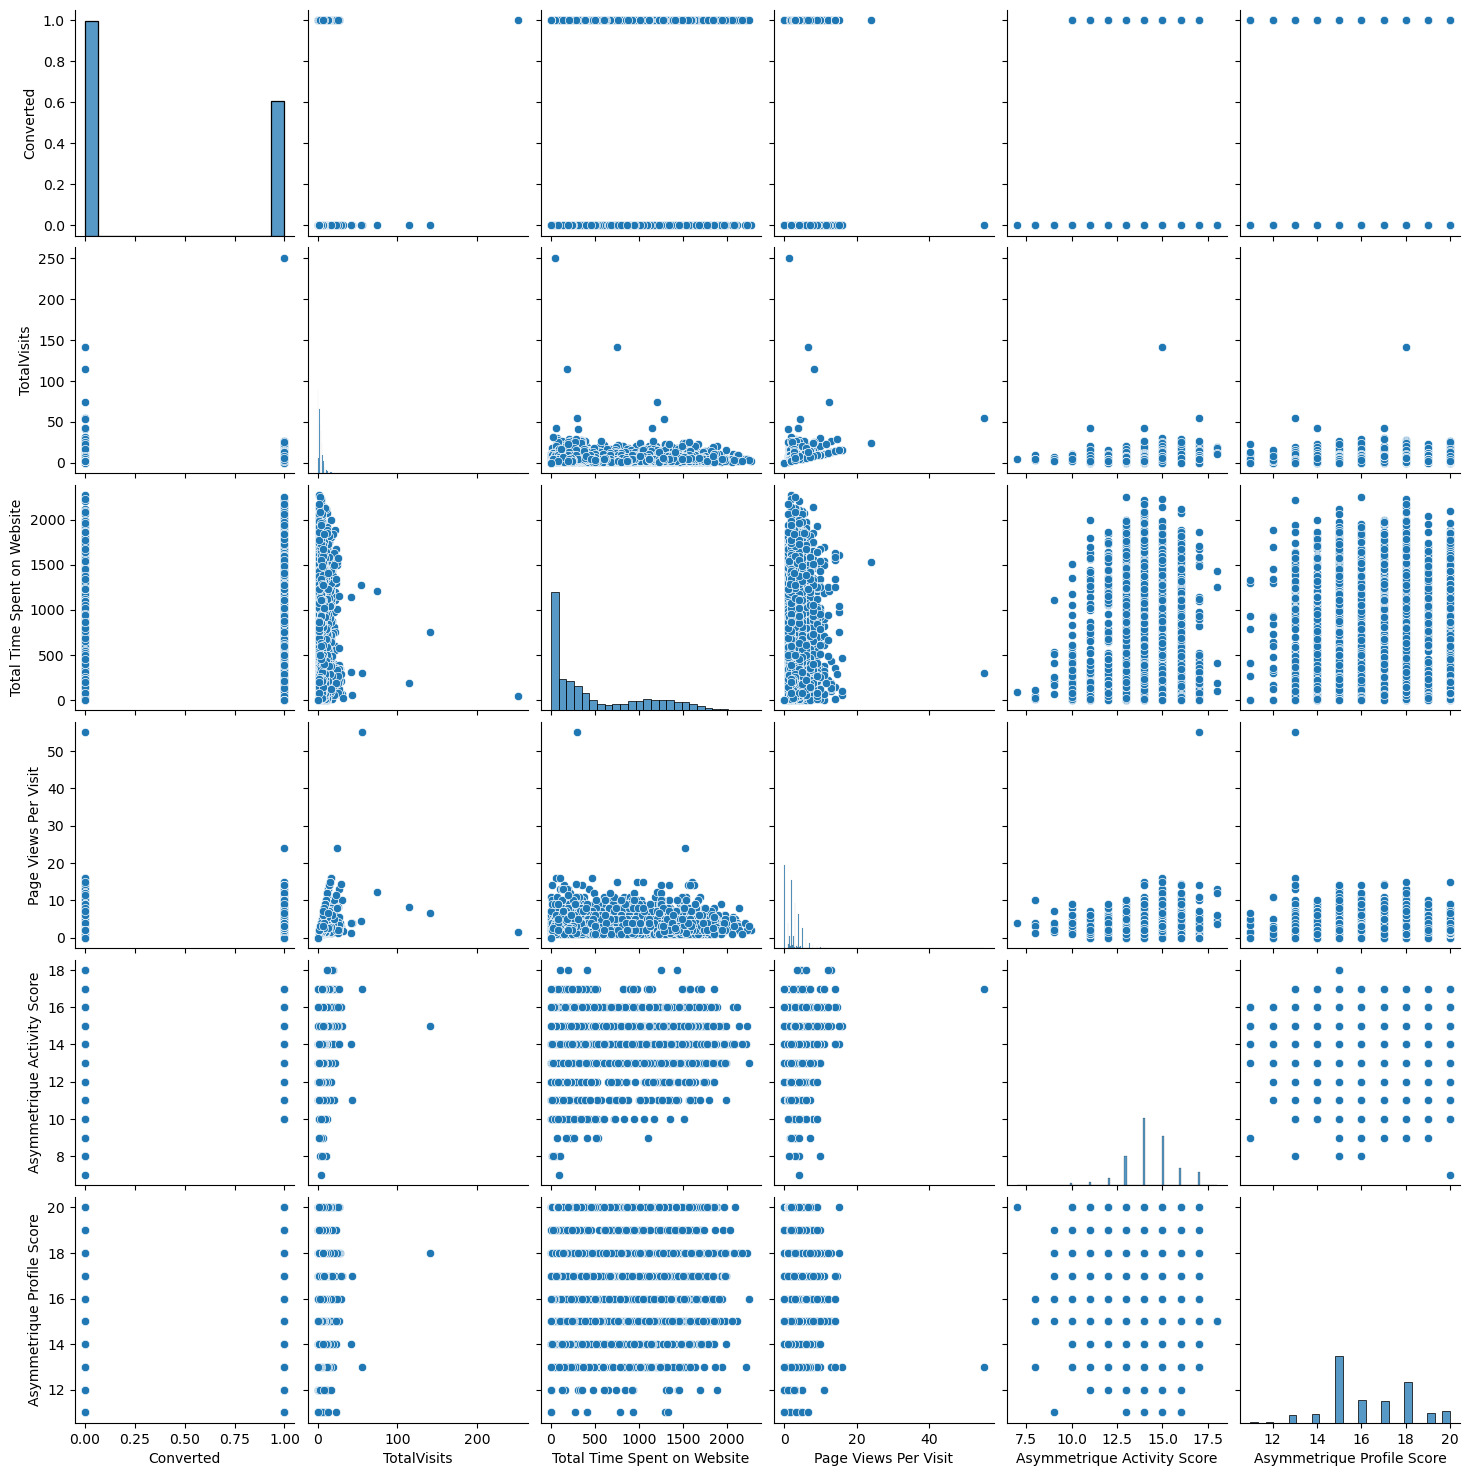

In [12]:
sns.pairplot(leads_df[['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']])
plt.show()

#### Visualising Categorical Variables

In [13]:
Categorical =['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education',
 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article',
 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']

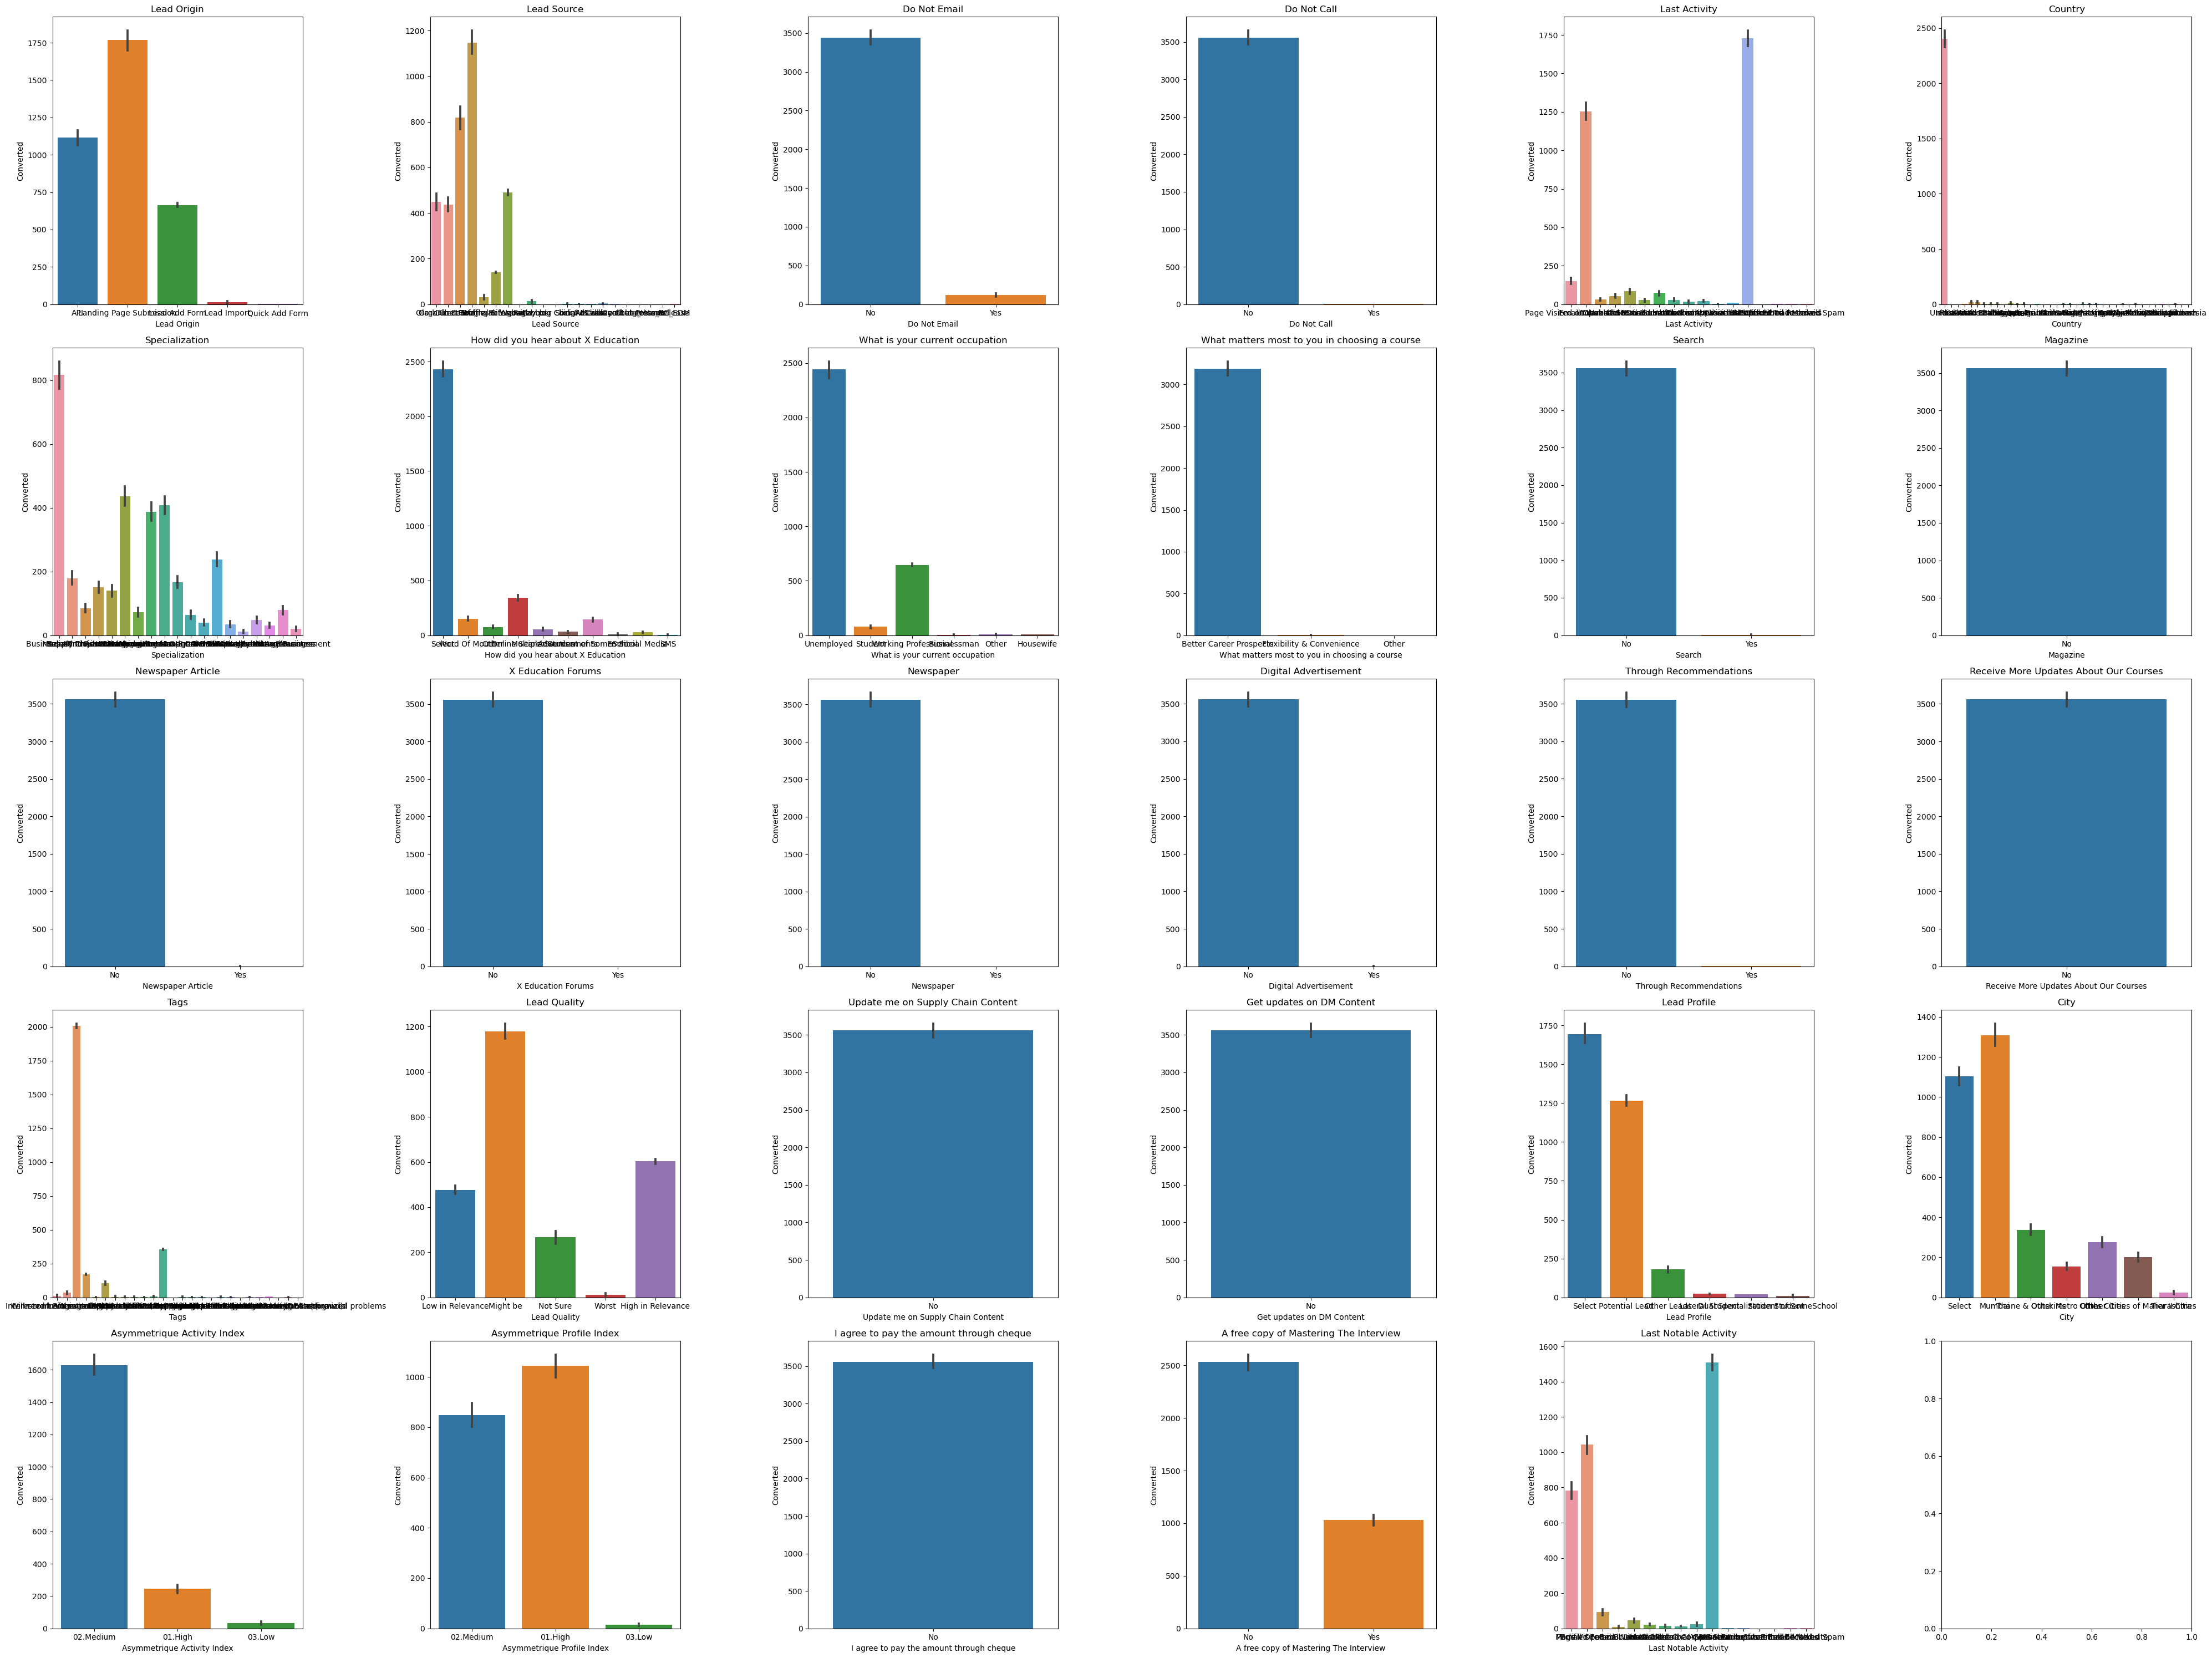

In [14]:
fig, axs = plt.subplots(5, 6, figsize=(40, 30))

# Create bar charts and add them to the subplots
for i, column in enumerate(Categorical):
    row = i // 6
    col = i % 6
    ax = axs[row, col]
    sns.barplot(x= column, y='Converted', data = leads_df, estimator='sum',ax=ax)
    ax.set_title(column)

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplot
plt.show()


#### Identifying 'Select' Domain Values in Multiple Columns with NULLs

In [15]:
leads_df['Specialization'].value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [16]:
leads_df['How did you hear about X Education'].value_counts(normalize=True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

In [17]:
leads_df['Lead Profile'].value_counts(normalize=True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

In [18]:
leads_df['City'].value_counts(normalize=True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

In [19]:
leads_df['City'] = leads_df['City'].replace('Select', None)
leads_df['Specialization'] = leads_df['Specialization'].replace('Select', None)
leads_df['Lead Profile'] = leads_df['Lead Profile'].replace('Select', None)
leads_df['How did you hear about X Education'] = leads_df['How did you hear about X Education'].replace('Select', None)

### Missing Value Treatment - 
1. For Categorical Variables - A separate missing category has been created to study the impact of missing values on Lead Conversion
2. For Numerical Variables - Variables are transformed into Categorical Type, with a seperate bucket for Null Values

##### Categorical Variables

In [20]:
# Identify categorical columns
categorical_columns = leads_df.select_dtypes(include=['object']).columns
# Create a list of categorical column names with null values
categorical_columns_with_nulls = [col for col in categorical_columns if leads_df[col].isnull().any()]
#Print List
categorical_columns_with_nulls

['Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [21]:
# Iterate over columns and replace None with 'missing'
for column in categorical_columns_with_nulls:
    leads_df[column] = leads_df[column].fillna('Missing')

In [22]:
#Identifying Yes/No Variables in the Dataset
Clean_Step.set_index(['Variable_Type']).filter(like='Cat',axis=0).query('Unique_Values < 3')

,Variable,Data_Type,Missing_Values,Missing_Values_Per,Unique_Values
Variable_Type,,,,,
Categorical,Do Not Email,object,0,0.0,2
Categorical,Do Not Call,object,0,0.0,2
Categorical,Search,object,0,0.0,2
Categorical,Magazine,object,0,0.0,1
Categorical,Newspaper Article,object,0,0.0,2
Categorical,X Education Forums,object,0,0.0,2
Categorical,Newspaper,object,0,0.0,2
Categorical,Digital Advertisement,object,0,0.0,2
Categorical,Through Recommendations,object,0,0.0,2


In [23]:
# Converting Yes/No Variables to Binary Variables
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations',
       'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the Leads Dataset
leads_df[varlist] = leads_df[varlist].apply(binary_map)

In [24]:
#Droping Columns from the data that don't provide any neccessary info or are already covered in some other column
leads_df=leads_df.drop(columns=['Magazine',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque',
'Asymmetrique Activity Score',
'Asymmetrique Profile Score'])

##### Numerical Variables

In [25]:
#Identifying Numerical Variables with high count of unique values
Clean_Step=Data_Quality(leads_df)
Clean_Step.set_index(['Variable_Type']).filter(like='Num',axis=0).query('Unique_Values > 2')

,Variable,Data_Type,Missing_Values,Missing_Values_Per,Unique_Values
Variable_Type,,,,,
Numerical,Lead Number,int64,0,0.000000,9240
Numerical,TotalVisits,float64,137,1.482684,41
Numerical,Total Time Spent on Website,int64,0,0.000000,1731
Numerical,Page Views Per Visit,float64,137,1.482684,114


In [26]:
# Transforming TotalVisits to Catergorical Buckets 
leads_df['TotalVisits']=pd.cut(leads_df['TotalVisits'],bins=[-1,0,1,2,3,4,5,6,7,8,9,9999],labels=["<0","1", "2", "3",'4','5', '6','7','8','9','10+'])
leads_df['TotalVisits']=leads_df['TotalVisits'].astype('object')

[Text(0.5, 1.0, 'Population Distribution')]

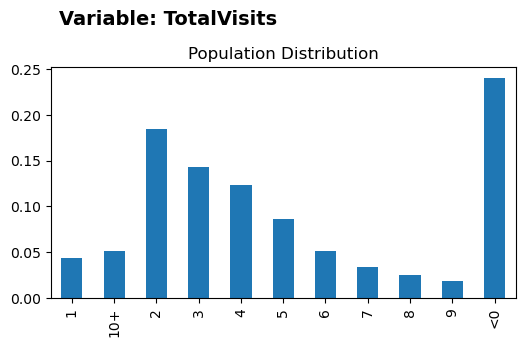

In [27]:
# TotalVisits
plt.figure(figsize=(6, 3))
plt.suptitle('Variable: TotalVisits', x= 0.32, y=1.07, fontsize =14, fontweight = 'demibold')
leads_df['TotalVisits'].value_counts(normalize=True).sort_index().plot.bar().set(title='Population Distribution')

In [28]:
# Transforming 'Page Views Per Visit' to Catergorical Buckets 
leads_df['Page Views Per Visit']=pd.cut(leads_df['Page Views Per Visit'],bins=[-1,0,1,2,3,4,5,9999],labels=["A.<0","B. 0-1", "C. 1-2", "D. 2-3",'E. 3-4','F. 4-5', 'G. 5+'])
leads_df['Page Views Per Visit']=leads_df['Page Views Per Visit'].astype('object')

[Text(0.5, 1.0, 'Population Distribution')]

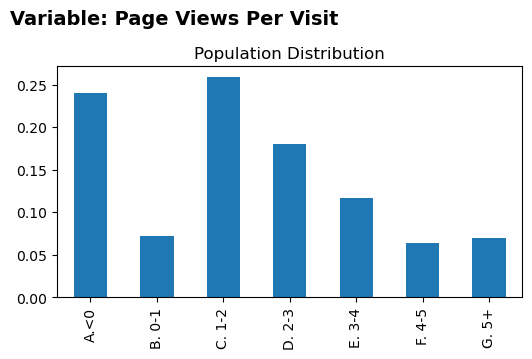

In [29]:
# Total Time Spent on Website
plt.figure(figsize=(6, 3))
plt.suptitle('Variable: Page Views Per Visit', x= 0.32, y=1.07, fontsize =14, fontweight = 'demibold')
leads_df['Page Views Per Visit'].value_counts(normalize=True).sort_index().plot.bar().set(title='Population Distribution')

In [30]:
# Transforming 'Total Time Spent on Website' to Catergorical Buckets 
leads_df['Total Time Spent on Website_2']=pd.qcut(leads_df['Total Time Spent on Website'],q=10, duplicates='drop')
leads_df['Total Time Spent on Website_2']=leads_df['Total Time Spent on Website_2'].astype('object')

[Text(0.5, 1.0, 'Population Distribution')]

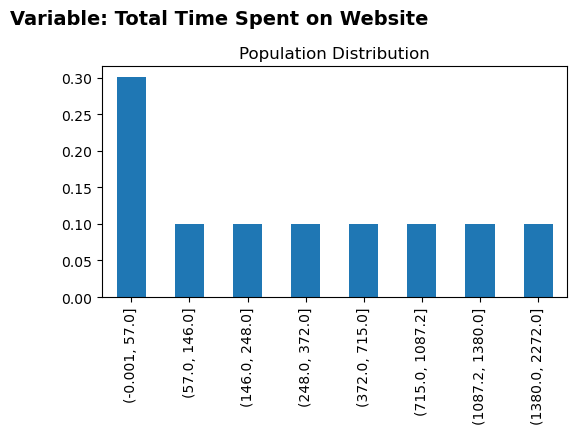

In [31]:
# Total Time Spent on Website
plt.figure(figsize=(6, 3))
plt.suptitle('Variable: Total Time Spent on Website', x= 0.32, y=1.07, fontsize =14, fontweight = 'demibold')
leads_df['Total Time Spent on Website_2'].value_counts(normalize=True).sort_index().plot.bar().set(title='Population Distribution')

In [32]:
leads_df=leads_df.drop('Total Time Spent on Website_2',1)

### Step 3: Data Preparation for Modelling

In [33]:
#Identifying Categorical Variables for One-Hot Encoding
Clean_Step=Data_Quality(leads_df)
Clean_Step.set_index(['Variable_Type']).filter(like='Cat',axis=0).query('Unique_Values > 2')['Variable'].to_list()

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Last Notable Activity']

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [34]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_df[[ 'Lead Origin',
 'Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Last Notable Activity']
], drop_first=True)

# Adding the results to the master dataframe
leads_df = pd.concat([leads_df, dummy1], axis=1)

In [35]:
leads_df.shape

(9240, 225)

#### Dropping the repeated variables

In [36]:
# We have created dummies for the below variables, so we can drop them
leads_df = leads_df.drop([ 'Lead Origin',
 'Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Last Notable Activity'], 1)

In [37]:
#Checking Data After Encoding
Clean_Step=Data_Quality(leads_df)
Clean_Step.set_index(['Variable_Type']).filter(like='Num',axis=0).query('Unique_Values > 2')

,Variable,Data_Type,Missing_Values,Missing_Values_Per,Unique_Values
Variable_Type,,,,,
Numerical,Lead Number,int64,0,0.0,9240
Numerical,Total Time Spent on Website,int64,0,0.0,1731


### Step 4: Test-Train Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Putting feature variable to X
X = leads_df.drop(['Prospect ID','Lead Number','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,305,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1428,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [40]:
# Putting response variable to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [41]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
### Checking the Lead Conversion Rate
Conversion = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Conversion

38.53896103896104

We have almost 38.5% lead conversion rate

### Step 5: Feature Scaling

#### For Numercial variables -  applying the scaling on the test sets

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
num_vars = ['Total Time Spent on Website']
X_train['Total Time Spent on Website'] = scaler.fit_transform(X_train[num_vars])

In [45]:
X_train['Total Time Spent on Website'].describe()

count    6468.000000
mean        0.212974
std         0.240566
min         0.000000
25%         0.005282
50%         0.108275
75%         0.407790
max         1.000000
Name: Total Time Spent on Website, dtype: float64

### Step 6: Feature Selection Using RFE

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [48]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 20),
 ('Do Not Call', False, 116),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 54),
 ('Newspaper Article', False, 149),
 ('X Education Forums', False, 107),
 ('Newspaper', False, 125),
 ('Digital Advertisement', False, 76),
 ('Through Recommendations', False, 159),
 ('A free copy of Mastering The Interview', False, 152),
 ('Lead Origin_Landing Page Submission', False, 55),
 ('Lead Origin_Lead Add Form', False, 48),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Origin_Quick Add Form', False, 114),
 ('Lead Source_Direct Traffic', False, 157),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 156),
 ('Lead Source_Live Chat', False, 172),
 ('Lead Source_Missing', False, 85),
 ('Lead Source_NC_EDM', False, 27),
 ('Lead Source_Olark Chat', False, 66),
 ('Lead Source_Organic Search', False, 155),
 ('Lead Source_Pay per Click Ads', False, 179),
 ('Lead Source_Press_Release', False, 148),
 ('Lead Source_Reference', False, 51),
 ('

In [50]:
col = X_train.columns[rfe.support_]

In [51]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=190)

### Step 7: Checking the Correlations

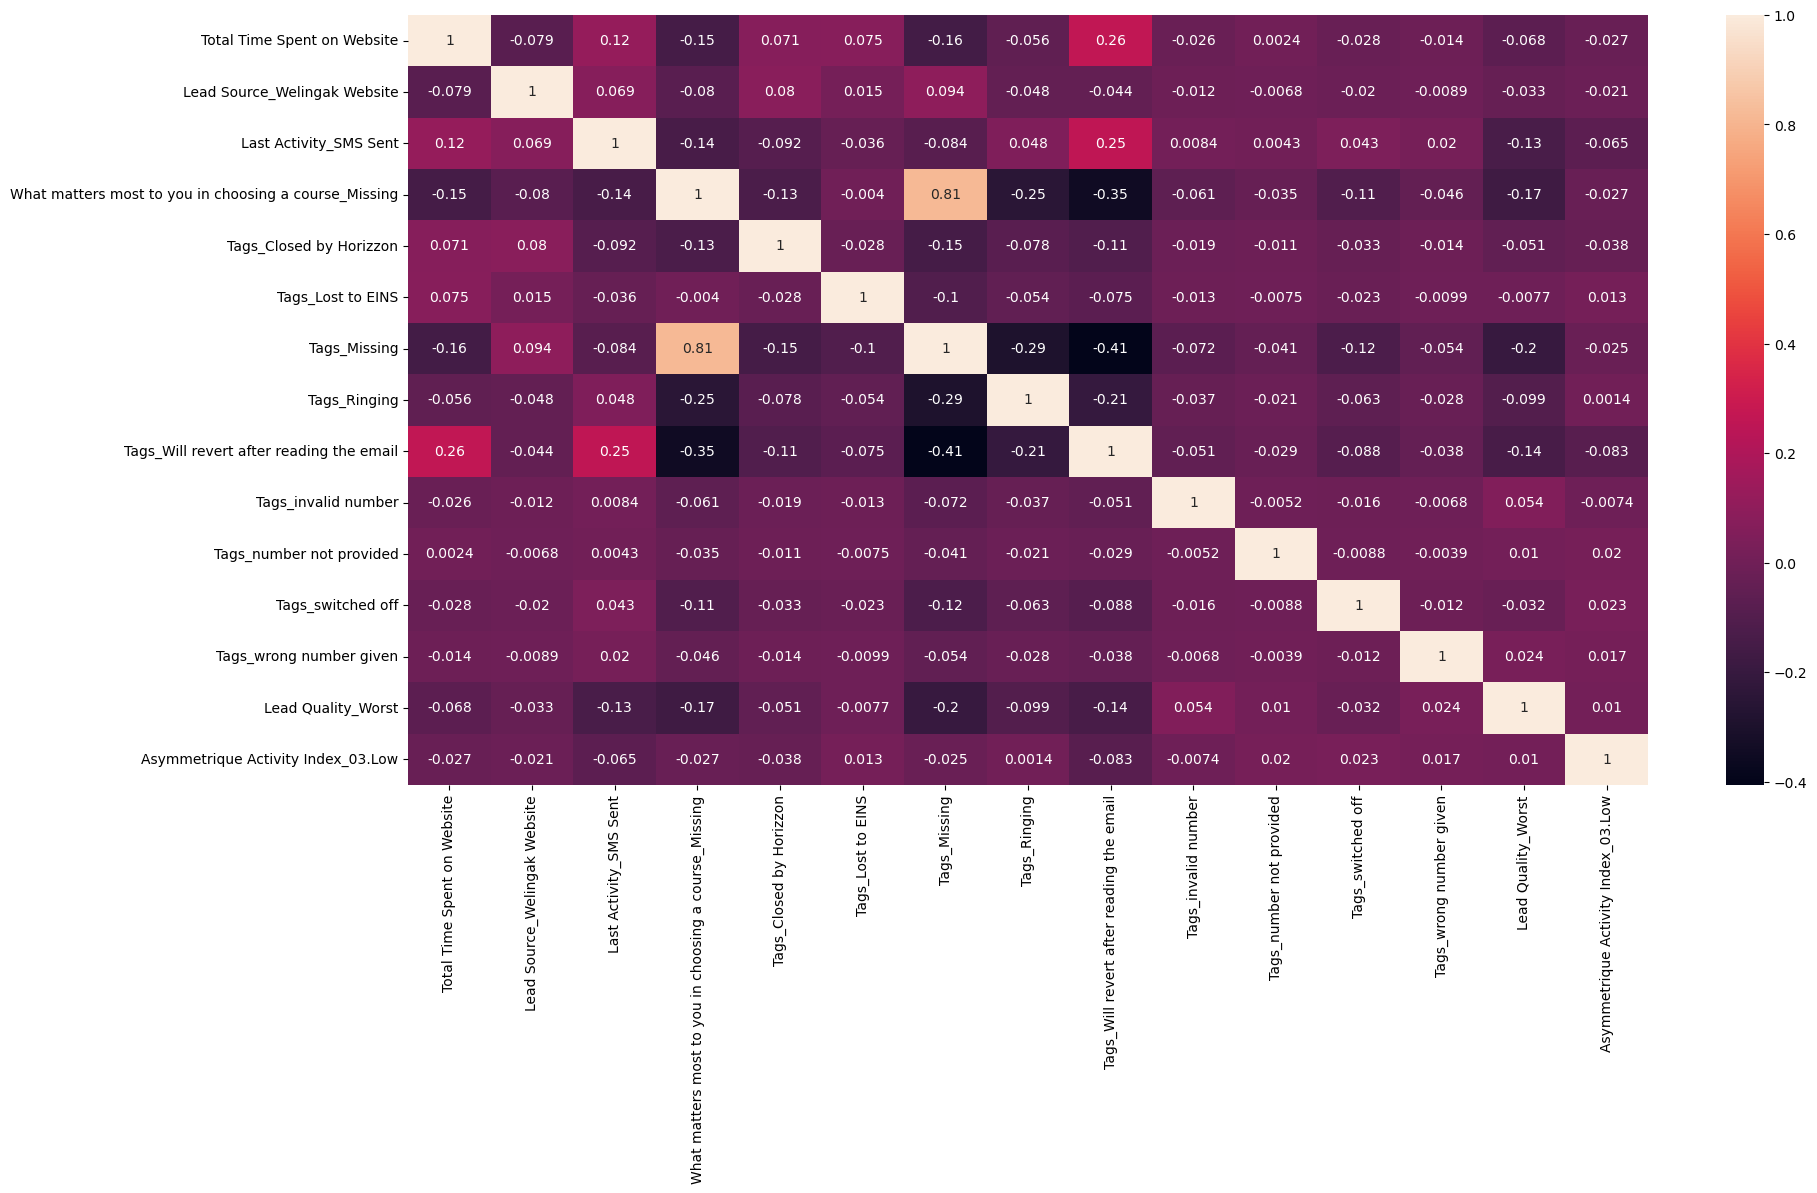

In [52]:
# Correlation matrix 
plt.figure(figsize = (20,10))    
sns.heatmap(leads_df[col].corr(),annot = True)
plt.show()

In [53]:
#Dropping highly correlated dummy variables
X_test = X_test.drop(['Tags_Missing'], 1)
X_train = X_train.drop(['Tags_Missing'], 1)

In [54]:
col = col.drop('Tags_Missing', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Missing',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

### Step 8: Logistic Regression Model Building

#### Creating a Logistic Regression model with StatsModels

In [55]:
import statsmodels.api as sm

In [56]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1382.4
Date:                Tue, 17 Oct 2023   Deviance:                       2764.8
Time:                        07:12:13   Pearson chi2:                 8.88e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5942
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.0382      0.097    -21.045      0.000      -2.228      -1.848
Total Time Spent on Website                               3.3173      0.205     16.148      0.000       2.915       3.720
Lead Source_Welingak Website                              4.5435      0.734      6.190      0.000       3.105       5.982
Last Activity_SMS Sent                                    2.2248      0.109     20.323      0.000       2.010       2.439
What matters most to you in choosing a course_Missing    -1.4050      0.113    -12.379      0.000      -1.627      -1.183
Tags_Closed by Horizzon                                   6.7414      1.008      6.689      0.000       4.766       8.717
Tags_Lost to EINS                                         6.7950      0.819      8.301      0.000       5.191       8.399
Tags_Ringing                                             -3.7239      0.234    -15.895      0.000      -4.183      -3.265
Tags_Will revert after reading the email                  4.0435      0.175     23.104      0.000       3.700       4.386
Tags_invalid number                                      -3.5924      1.036     -3.467      0.001      -5.624      -1.561
Tags_number not provided                                -24.2458   2.46e+04     -0.001      0.999   -4.83e+04    4.83e+04
Tags_switched off                                        -3.9265      0.526     -7.466      0.000      -4.957      -2.896
Tags_wrong number given                                 -24.3322   2.06e+04     -0.001      0.999   -4.03e+04    4.03e+04
Lead Quality_Worst                                       -3.7835      0.551     -6.873      0.000      -4.862      -2.705
Asymmetrique Activity Index_03.Low                       -2.0332      0.361     -5.627      0.000      -2.741      -1.325
=========================================================================================================================
"""

#### Checking VIF of the Variables 

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.77
7,Tags_Will revert after reading the email,1.60
2,Last Activity_SMS Sent,1.54
3,What matters most to you in choosing a course_...,1.16
6,Tags_Ringing,1.14
4,Tags_Closed by Horizzon,1.07
10,Tags_switched off,1.04
1,Lead Source_Welingak Website,1.03
5,Tags_Lost to EINS,1.03
12,Lead Quality_Worst,1.03


Based on VIF & P Value checks of the variables, following variables should be excluded from the model -
1. Tags_number not provided
2. Tags_wrong number given

In [59]:
col = col.drop(['Tags_number not provided','Tags_wrong number given'], 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Missing',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

### Step 9 - Retraining the Model using the new set of variables

In [60]:
# Retraining the Model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1407.3
Date:                Tue, 17 Oct 2023   Deviance:                       2814.6
Time:                        07:12:13   Pearson chi2:                 8.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5911
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.1009      0.097    -21.743      0.000      -2.290      -1.911
Total Time Spent on Website                               3.2927      0.203     16.223      0.000       2.895       3.691
Lead Source_Welingak Website                              4.6208      0.733      6.300      0.000       3.183       6.058
Last Activity_SMS Sent                                    2.1623      0.107     20.158      0.000       1.952       2.373
What matters most to you in choosing a course_Missing    -1.3048      0.112    -11.682      0.000      -1.524      -1.086
Tags_Closed by Horizzon                                   6.8096      1.008      6.757      0.000       4.834       8.785
Tags_Lost to EINS                                         6.8132      0.820      8.306      0.000       5.206       8.421
Tags_Ringing                                             -3.6004      0.232    -15.492      0.000      -4.056      -3.145
Tags_Will revert after reading the email                  4.1183      0.175     23.590      0.000       3.776       4.460
Tags_invalid number                                      -3.4791      1.035     -3.361      0.001      -5.508      -1.451
Tags_switched off                                        -3.8037      0.525     -7.247      0.000      -4.832      -2.775
Lead Quality_Worst                                       -3.7610      0.549     -6.849      0.000      -4.837      -2.685
Asymmetrique Activity Index_03.Low                       -2.0197      0.361     -5.599      0.000      -2.727      -1.313
=========================================================================================================================
"""

In [61]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.003331
6795    0.198600
3516    0.003882
8105    0.147256
3934    0.109013
4844    0.998268
3297    0.003766
8071    0.994530
987     0.097572
7423    0.998414
dtype: float64

In [62]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00333077, 0.19860026, 0.0038817 , 0.1472558 , 0.10901313,
       0.99826769, 0.00376578, 0.99452958, 0.09757189, 0.99841403])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [63]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,CustID
0,0,0.003331,1871
1,0,0.198600,6795
2,0,0.003882,3516
3,0,0.147256,8105
4,0,0.109013,3934


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [64]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conversion_Prob,CustID,predicted
0,0,0.003331,1871,0
1,0,0.198600,6795,0
2,0,0.003882,3516,0
3,0,0.147256,8105,0
4,0,0.109013,3934,0


In [65]:
from sklearn import metrics

### Step 10 - Evaluating Model Performance

In [66]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3797  205]
 [ 333 2133]]


In [67]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.9168212739641312


In [68]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [69]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.864963503649635

In [70]:
# Let us calculate specificity
TN / float(TN+FP)

0.948775612193903

In [71]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05122438780609695


##### Checking the VIFs again

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.76
7,Tags_Will revert after reading the email,1.60
2,Last Activity_SMS Sent,1.53
3,What matters most to you in choosing a course_...,1.15
6,Tags_Ringing,1.14
4,Tags_Closed by Horizzon,1.07
9,Tags_switched off,1.04
1,Lead Source_Welingak Website,1.03
5,Tags_Lost to EINS,1.03
10,Lead Quality_Worst,1.03


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### Step 11: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [73]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [74]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

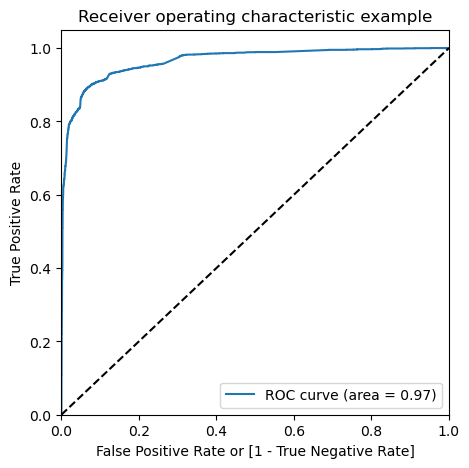

In [75]:
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

### Step 12: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [76]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003331,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.198600,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.003882,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.147256,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.109013,3934,0,1,1,0,0,0,0,0,0,0,0


In [77]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.802257  0.978102  0.693903
0.2   0.2  0.892084  0.932685  0.867066
0.3   0.3  0.911565  0.902676  0.917041
0.4   0.4  0.918058  0.884428  0.938781
0.5   0.5  0.916821  0.864964  0.948776
0.6   0.6  0.910328  0.814274  0.969515
0.7   0.7  0.907854  0.791565  0.979510
0.8   0.8  0.902134  0.770884  0.983008
0.9   0.9  0.871367  0.680454  0.989005


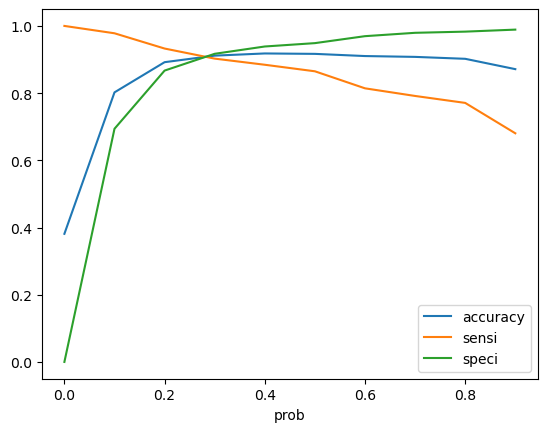

In [78]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [79]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.003331,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.198600,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.003882,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.147256,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.109013,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [80]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.9115646258503401

In [81]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted )
confusion2

array([[3670,  332],
       [ 240, 2226]], dtype=int64)

In [82]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [83]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.902676399026764

In [84]:
# Calculating specificity
TN / float(TN+FP)

0.9170414792603698

In [85]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08295852073963018


### Step 13: Making predictions on the test set

In [86]:
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

In [87]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,What matters most to you in choosing a course_Missing,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Worst,Asymmetrique Activity Index_03.Low
4269,0.444982,0,1,1,0,0,0,0,0,0,0,0
2376,0.000000,0,1,0,0,0,0,1,0,0,0,0
7766,0.025968,0,0,0,0,0,0,1,0,0,0,0
9199,0.000000,0,0,0,0,0,0,0,0,0,0,0
4359,0.000000,0,0,0,0,0,0,1,0,0,0,0


In [88]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [89]:
y_test_pred = res.predict(X_test_sm)

In [90]:
y_test_pred[:10]

4269    0.555243
2376    0.984928
7766    0.891189
9199    0.109013
4359    0.882616
9186    0.993736
1631    0.970274
8963    0.917272
8007    0.051803
5324    0.988010
dtype: float64

In [91]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [92]:
# Let's see the head
y_pred_1.head()

,0
4269,0.555243
2376,0.984928
7766,0.891189
9199,0.109013
4359,0.882616


In [93]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [94]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [95]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [96]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [97]:
y_pred_final.head()

,Converted,CustID,0
0,1,4269,0.555243
1,1,2376,0.984928
2,1,7766,0.891189
3,0,9199,0.109013
4,1,4359,0.882616


In [98]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [99]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,CustID,Conversion_Prob
0,1,4269,0.555243
1,1,2376,0.984928
2,1,7766,0.891189
3,0,9199,0.109013
4,1,4359,0.882616


In [100]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [101]:
y_pred_final.head()

,Converted,CustID,Conversion_Prob,final_predicted
0,1,4269,0.555243,1
1,1,2376,0.984928,1
2,1,7766,0.891189,1
3,0,9199,0.109013,0
4,1,4359,0.882616,1


### Step 14: Checking the Performance of the Model on Test Set

In [102]:
# Overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9181096681096681

In [103]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1571,  106],
       [ 121,  974]], dtype=int64)

In [104]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [105]:
# Sensitivity of the logistic regression model
TP / float(TP+FN)

0.8894977168949771

In [106]:
# Calculating specificity
TN / float(TN+FP)

0.9367918902802623